In [276]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import joblib

In [278]:
#Load Data
data = pd.read_csv('/Users/yaswanthwuyyuru/Documents/Data_Engineer_Projects/Machine_Learning_Models/Credit_Card_Fraud_Detection/creditcardtransactiondata.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [280]:
pd.options.display.max_columns = None
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [282]:
#Define The Rows And Columns In The Dataset
data.shape

(284807, 31)

In [284]:
#Print Number Of Rows And Columns
print("Number Of Columns: {}".format(data.shape[1]))
print("Number Of Rows: {}".format(data.shape[0]))

Number Of Columns: 31
Number Of Rows: 284807


In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [288]:
#Print The Statistical Data From The Dataset
data.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,-25.0,-5.0,-19.0,-6.0,-19.0,-4.0,-14.0,-25.0,-9.0,-7.0,-54.0,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,24.0,12.0,8.0,7.0,11.0,9.0,17.0,9.0,5.0,6.0,39.0,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


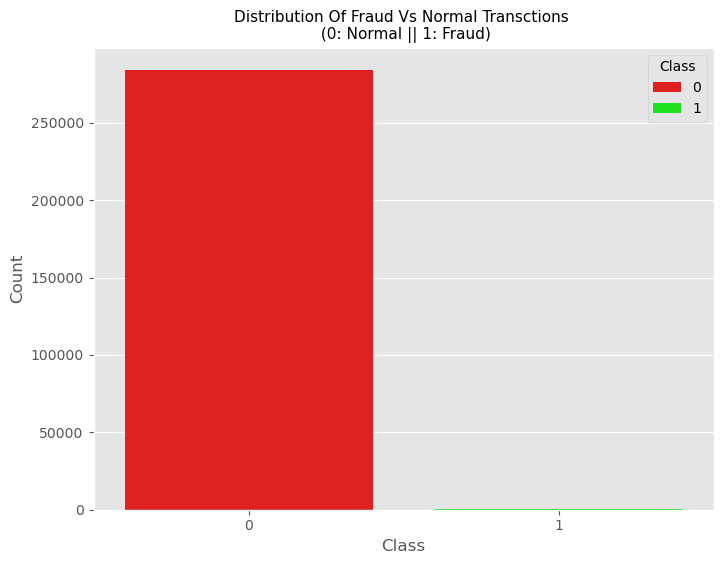

In [289]:
#Visualize The Target Variable Class Column Imbalance
plt.style.use('ggplot')
plt.figure(figsize = (8,6))
colors = ['#FF0000', '#00FF00']
sns.countplot(x = 'Class', data = data, palette = colors, hue = 'Class')
plt.title('Distribution Of Fraud Vs Normal Transctions \n (0: Normal || 1: Fraud)', fontsize = 11)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [291]:
#Data Preprocessing
#Check For Missing Values
#Handle Duplicates
#Scale The Features(Amount, Time)
#Split Features And Targets
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [292]:
#Display The Count Of Duplicated Values
data.duplicated().sum()

1081

In [295]:
#Drop The Duplicated Rows
data.drop_duplicates(inplace = True)

In [297]:
#Print The Rows And Columns Of The Dataset After Dropping The Duplicates
data.shape

(283726, 31)

In [300]:
#Print The Number Of Rows And Columns
print("Number Of Columns: {}".format(data.shape[1]))
print("Number Of Rows: {}".format(data.shape[0]))

Number Of Columns: 31
Number Of Rows: 283726


In [302]:
#Standardize The Featues
scaler = StandardScaler()
data[["Time", "Amount"]] = scaler.fit_transform(data[["Time","Amount"]])
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [304]:
#Split The Features And Targets
X = data.drop('Class', axis = 1)
y = data['Class']

In [306]:
pd.options.display.max_columns = None
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813


In [308]:
#Investigate Correlations Between Features
#Correlation analysis helps to understand how features in the dataset relate to each other. 
#High correlation between features might indicate redundancy, 
#while low correlation can suggest that features capture different aspects of the data.

#Let's calculate and visualize the correlation matrix.
corr_matrix = data.corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


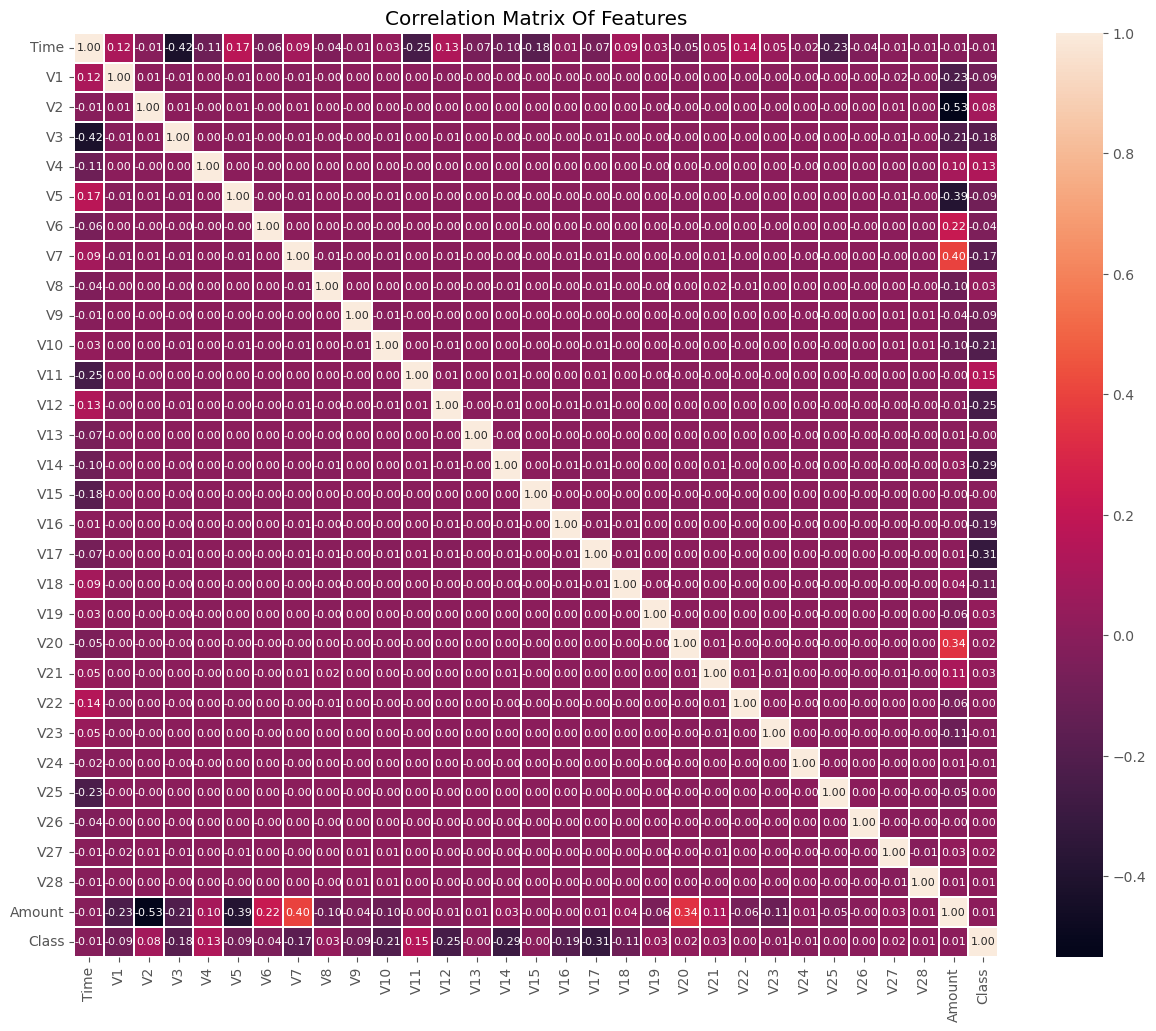

In [309]:
#Plot The Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', linewidth = 0.25, annot_kws= {"size": 8}, square = True)
plt.title('Correlation Matrix Of Features')
plt.show()

In [310]:
#Split The Data Into Training And Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [312]:
X_train.shape

(212794, 30)

In [313]:
print("Number Of Columns:{} ".format(X_train.shape[1]))
print("Number Of Rows: {}".format(X_train.shape[0]))

Number Of Columns:30 
Number Of Rows: 212794


In [314]:
X_test.shape

(70932, 30)

In [315]:
print("Number Of Columns:{} ".format(X_test.shape[1]))
print("Number Of Rows:{} ".format(X_test.shape[0]))

Number Of Columns:30 
Number Of Rows:70932 


In [322]:
#Train And Evaluate Model On Imbalanced Data

def train_model(X_train, X_test, y_train, y_test):
    classifier = {
        "LogisticRegression" : LogisticRegression(),
        "DecisionTreeClassifier" : DecisionTreeClassifier(),
        "RandomForestClassifier" : RandomForestClassifier(random_state = 42)
    }

    for name, model in classifier.items():
        print(f"\n============== {name} ========\n")
        model.fit(X_train, y_train)

        #Make Predictions
        y_pred = model.predict(X_test)

        #Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"\nConfusion Matrix: \n{conf_matrix}\n")
        #Accuracy Score
        acc_score = accuracy_score(y_test, y_pred)
        print(f"\nAccuracy Score: \n{acc_score}\n")

        #Roc-Score
        roc_score = roc_auc_score(y_test, y_pred)
        print(f"\n Roc-Score: \n {roc_score}\n")

        #Classification Report
        class_report = classification_report(y_test, y_pred)
        print(f"\n Classification Report: \n{class_report}\n")
    

    

In [324]:
train_model(X_train, X_test, y_train, y_test)


============== LogisticRegression ========


Confusion Matrix: 
[[70811     9]
 [   50    62]]


Accuracy Score: 
0.9991682174476963


 Roc-Score: 
 0.7767221729132207


 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.87      0.55      0.68       112

    accuracy                           1.00     70932
   macro avg       0.94      0.78      0.84     70932
weighted avg       1.00      1.00      1.00     70932



============== DecisionTreeClassifier ========


Confusion Matrix: 
[[70789    31]
 [   27    85]]


Accuracy Score: 
0.9991823154570575


 Roc-Score: 
 0.8792454209868076


 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.73      0.76      0.75       112

    accuracy                           1.00     70932
   macro avg       0.87      0.88      0.87     70932
weig

In [325]:
#Handling Imbalanced Data
normal_transaction = data[data['Class' ]== 0]
fraud_transaction = data[data['Class'] == 1]
#Print The Shape For Further Reference
print(f"\nNormal Transaction: {normal_transaction.shape}\n")
print(f"\nFraud Detection: {fraud_transaction.shape}\n")


Normal Transaction: (283253, 31)


Fraud Detection: (473, 31)



In [326]:
#Undersample The Normal Transactions
normal_sample = normal_transaction.sample(n = fraud_transaction.shape[0])

In [327]:
#Print New Normal Transaction Shape
print(f"New Normal Transaction Shape: {normal_sample.shape}\n")

New Normal Transaction Shape: (473, 31)



In [328]:
#Concatenate Updated Normal Transactions With Old Fraud Transaction And Make A New DataFrame
sampled_data = pd.concat([normal_sample, fraud_transaction], ignore_index = True)

In [329]:
pd.options.display.max_columns = None
sampled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.141175,1.000318,-0.013980,0.452971,1.371895,-0.248016,0.040099,0.044094,0.102766,0.010924,0.018209,1.345895,1.288697,-0.242064,0.287414,-0.803195,-0.579457,0.089148,-0.538748,-0.173028,-0.073573,-0.003031,0.065496,-0.098640,0.235052,0.585187,-0.348201,0.025956,0.017445,-0.098653,0
1,-1.269100,1.322129,-0.842790,0.530269,-0.454597,-1.281776,-0.398714,-0.761118,0.022468,-0.083278,0.529915,-1.518626,-0.817507,-1.226837,-0.062098,0.057520,-1.323499,0.208610,0.822732,-0.146522,-0.509004,-0.788891,-1.809333,0.185709,-0.164531,-0.038427,0.761896,-0.048075,0.013650,-0.193781,0
2,-1.285717,-0.860001,0.427965,1.481347,0.509439,0.845716,-1.269768,0.511546,-0.574054,0.149104,0.467675,-0.091019,-0.558635,-0.450654,-0.720678,1.401768,-0.037511,0.046515,-0.067135,0.639591,0.007257,-0.367919,-0.507868,-0.234789,0.357268,-0.806984,0.036703,-0.055058,-0.280994,-0.317424,0
3,0.778416,-5.315750,2.836571,-3.803952,-0.416755,-2.714090,-1.300407,-1.810360,3.363246,-0.031463,0.208914,-0.261356,1.668120,-0.604392,2.561097,-1.024151,1.028521,0.748345,-0.070957,-0.151784,-0.234556,-0.142829,-0.881625,0.055513,0.004558,-0.148880,0.138145,-0.091815,-0.064599,-0.173654,0
4,0.967734,1.768415,-0.001523,-1.972999,1.280098,0.870043,0.452997,-0.086179,0.112232,0.369636,-0.606886,0.616082,0.668173,0.806188,-2.110141,-0.105772,1.288062,0.463631,1.620737,-0.244585,0.147329,-0.014591,-0.124867,-0.057762,-0.547646,0.040536,-0.671195,0.045418,0.020065,0.121915,0


In [336]:
#Check New Class Distribution
sampled_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [338]:
#Split newly sampled Data Into Train And Test Data
X = sampled_data.drop('Class', axis = 1)
y = sampled_data['Class']

In [340]:
#Split The dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [342]:
train_model(X_train, X_test, y_train, y_test)


============== LogisticRegression ========


Confusion Matrix: 
[[109   6]
 [  9 113]]


Accuracy Score: 
0.9367088607594937


 Roc-Score: 
 0.9370277975766215


 Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       115
           1       0.95      0.93      0.94       122

    accuracy                           0.94       237
   macro avg       0.94      0.94      0.94       237
weighted avg       0.94      0.94      0.94       237



============== DecisionTreeClassifier ========


Confusion Matrix: 
[[ 99  16]
 [  9 113]]


Accuracy Score: 
0.8945147679324894


 Roc-Score: 
 0.8935495367070564


 Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       115
           1       0.88      0.93      0.90       122

    accuracy                           0.89       237
   macro avg       0.90      0.89      0.89       237
weighted avg       0

In [344]:
#Over Sampling The Dataset To Match The Normal Transaction Sample To The Fraud Transactions
X = data.drop('Class', axis = 1)
y = data['Class']

In [346]:
smote  = SMOTE(random_state = 42)
X_sampled_data, y_sampled_data = smote.fit_resample(X,y)

In [348]:
y_sampled_data.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled_data, y_sampled_data, test_size = 0.25, random_state = 42)

In [352]:
train_model(X_train, X_test, y_train, y_test)


============== LogisticRegression ========


Confusion Matrix: 
[[68961  1819]
 [ 5944 64903]]


Accuracy Score: 
0.9451870053026612


 Roc-Score: 
 0.9452007716878864


 Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     70780
           1       0.97      0.92      0.94     70847

    accuracy                           0.95    141627
   macro avg       0.95      0.95      0.95    141627
weighted avg       0.95      0.95      0.95    141627



============== DecisionTreeClassifier ========


Confusion Matrix: 
[[70581   199]
 [   68 70779]]


Accuracy Score: 
0.9981147662521976


 Roc-Score: 
 0.9981143282536904


 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70780
           1       1.00      1.00      1.00     70847

    accuracy                           1.00    141627
   macro avg       1.00      1.00      1.00    141627
weig

In [354]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [355]:
#Load The Model
# Save the model to a file (use .pkl for the extension)
joblib.dump(train_model, 'credit_card_model.pkl')


['credit_card_model.pkl']

In [356]:
# Load the model from the file
model = joblib.load('credit_card_model.pkl')


In [364]:
from sklearn.ensemble import RandomForestClassifier

# Ensure the model is correctly defined as a classifier
model = RandomForestClassifier(random_state=42)

# Assuming X_train and y_train are already defined
model.fit(X_train, y_train)

# Now make predictions using the correctly trained model
pred = model.predict([[-1.2063166480452974, -0.653464067093327, 1.15579454161356, 1.4398458100309,
                       -0.0483979577939286, -0.257954764175468, -0.763320426103366, 0.339229688923037,
                       -0.768705965846787, -0.115541693321453, -0.20021646873148, -0.650926246487322,
                       -0.735778340137806, -1.3940656101548, 0.447721760826057, 0.98477163074674,
                       0.271223077633162, -0.251055900420813, -0.165413052650476, 0.0091942158033362,
                       -0.160498072645411, 0.518041029678345, -0.970619090556498, 0.104889604203672,
                       0.307935462300307, -0.222502578722938, 0.0825004649897294, 0.291624326333603,
                       0.125488524044667, -0.3442213776454372]])

# Check the prediction
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")


Normal Transaction


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(type(model))